In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import numpy as np

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Reshape the training images for the CNN model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Create a CNN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Create an SVM model
svm_model = SVC(kernel='linear')

# Reshape the training and test images for the SVM model
svm_train_images = train_images.reshape(train_images.shape[0], -1)
svm_test_images = test_images.reshape(test_images.shape[0], -1)

# Train the SVM model
svm_model.fit(svm_train_images, train_labels)

# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = model.evaluate(test_images, test_labels)

# Calculate the CNN predictions
cnn_predictions = np.argmax(model.predict(test_images), axis=-1)

# Calculate the accuracy, precision, recall, and F1-score of the CNN model
cnn_test_accuracy = metrics.accuracy_score(test_labels, cnn_predictions)
cnn_precision = metrics.precision_score(test_labels, cnn_predictions, average='macro')
cnn_recall = metrics.recall_score(test_labels, cnn_predictions, average='macro')
cnn_f1 = metrics.f1_score(test_labels, cnn_predictions, average='macro')

# Evaluate the SVM model
svm_predictions = svm_model.predict(svm_test_images)

# Calculate the accuracy, precision, recall, and F1-score of the SVM model
svm_test_accuracy = metrics.accuracy_score(test_labels, svm_predictions)
svm_precision = metrics.precision_score(test_labels, svm_predictions, average='macro')
svm_recall = metrics.recall_score(test_labels, svm_predictions, average='macro')
svm_f1 = metrics.f1_score(test_labels, svm_predictions, average='macro')

print('CNN test accuracy:', cnn_test_accuracy)
print('CNN precision:', cnn_precision)
print('CNN recall:', cnn_recall)
print('CNN F1-score:', cnn_f1)
print('SVM test accuracy:', svm_test_accuracy)
print('SVM precision:', svm_precision)
print('SVM recall:', svm_recall)
print('SVM F1-score:', svm_f1)


Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5211 - accuracy: 0.8173 - val_loss: 0.4173 - val_accuracy: 0.8464
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3887 - accuracy: 0.8598 - val_loss: 0.3646 - val_accuracy: 0.8688
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3487 - accuracy: 0.8732 - val_loss: 0.3433 - val_accuracy: 0.8741
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3234 - accuracy: 0.8816 - val_loss: 0.3635 - val_accuracy: 0.8673
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3050 - accuracy: 0.8875 - val_loss: 0.3217 - val_accuracy: 0.8792
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2885 - accuracy: 0.8945 - val_loss: 0.3152 - val_accuracy: 0.8864
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2762 - accuracy: 0.8966 - val_loss: 0.3161 - val_accuracy:

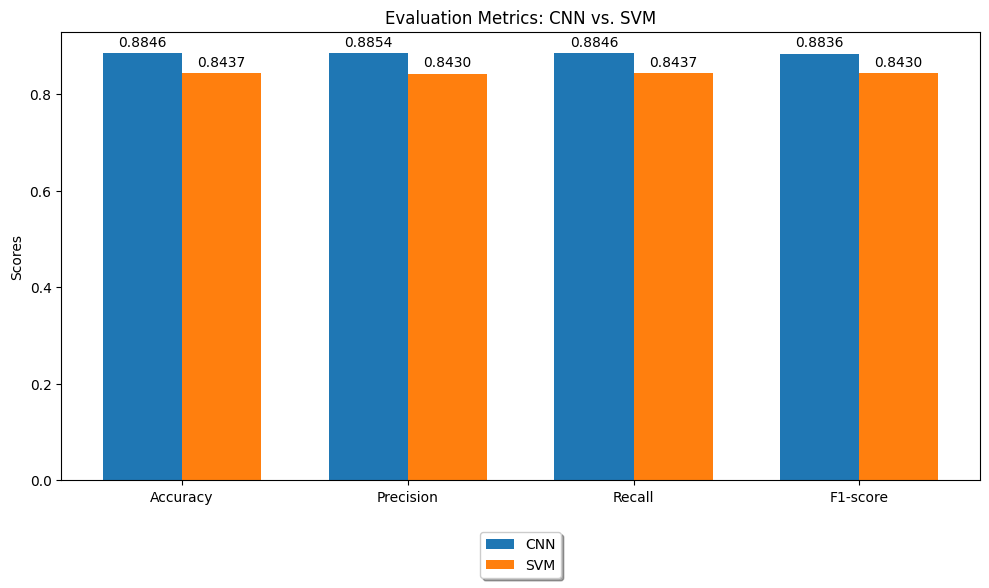

CNN Confusion Matrix:
 [[874   2  11  19   6   0  77   0  11   0]
 [  2 974   0  19   3   0   1   0   1   0]
 [ 26   2 855   6  70   0  40   0   1   0]
 [ 23   6  24 873  48   0  19   0   7   0]
 [  1   1 130  20 808   0  35   0   5   0]
 [  0   0   0   1   0 962   0  13   0  24]
 [151   0 105  23  85   0 627   0   9   0]
 [  0   0   0   0   0  25   0 919   0  56]
 [  3   1   5   4   3   2   3   2 977   0]
 [  0   0   0   1   0   6   1  15   0 977]]

SVM Confusion Matrix:
 [[813   3  11  51   5   1 106   0  10   0]
 [  4 960   2  25   4   0   4   0   1   0]
 [ 28   7 769   8 101   0  82   0   5   0]
 [ 54  19  19 837  27   0  40   0   4   0]
 [  1   2 121  33 760   0  79   0   4   0]
 [  0   0   0   1   0 930   0  42   4  23]
 [162   3 116  39  88   0 570   0  22   0]
 [  0   0   0   0   0  39   0 930   1  30]
 [ 10   1  12  13   4  12  20   5 923   0]
 [  0   0   0   0   0  17   1  37   0 945]]


In [ ]:
import matplotlib.pyplot as plt

# Evaluation metrics for CNN model
cnn_metrics = {'Accuracy': cnn_test_accuracy,
               'Precision': cnn_precision,
               'Recall': cnn_recall,
               'F1-score': cnn_f1}

# Evaluation metrics for SVM model
svm_metrics = {'Accuracy': svm_test_accuracy,
               'Precision': svm_precision,
               'Recall': svm_recall,
               'F1-score': svm_f1}

# List of metrics for plotting
metrics_list = list(cnn_metrics.keys())

# List of scores for CNN and SVM models
cnn_scores = list(cnn_metrics.values())
svm_scores = list(svm_metrics.values())

# Position of metrics on x-axis
x = np.arange(len(metrics_list))

# Width of the bars
width = 0.35

# Plotting the bars with increased figure size
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, cnn_scores, width, label='CNN')
rects2 = ax.bar(x + width/2, svm_scores, width, label='SVM')

# Adding labels, title, and legend
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics: CNN vs. SVM')
ax.set_xticks(x)
ax.set_xticklabels(metrics_list)

# Adjusting the position of the legend to be below the plot
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True)

# Adding values on top of the bars with rounding off to 4 decimal places
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.4f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

# Display the plot
plt.tight_layout()
plt.show()


from sklearn.metrics import confusion_matrix

# For CNN model
cnn_confusion = confusion_matrix(test_labels, cnn_predictions)

# For SVM model
svm_confusion = confusion_matrix(test_labels, svm_predictions)

print("CNN Confusion Matrix:\n", cnn_confusion)
print("\nSVM Confusion Matrix:\n", svm_confusion)


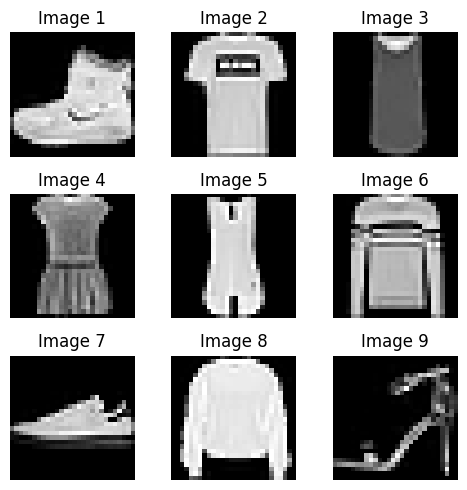

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(train_images, _), (_, _) = fashion_mnist.load_data()

# Plot the first 9 images
plt.figure(figsize=(5, 5))  # Adjust the figure size
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i], cmap='gray', interpolation='nearest')
    plt.title(f"Image {i + 1}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0

# Create a CNN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Extract the loss values from the history
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(loss_values) + 1)


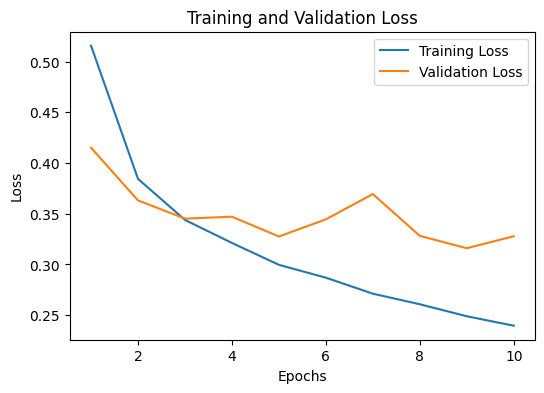

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(6, 4))
plt.plot(epochs, loss_values, label='Training Loss')
plt.plot(epochs, val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Normalize the images
train_images = train_images / 255.0

# Create a CNN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

# Get model predictions for the entire dataset
predictions = model.predict(train_images)



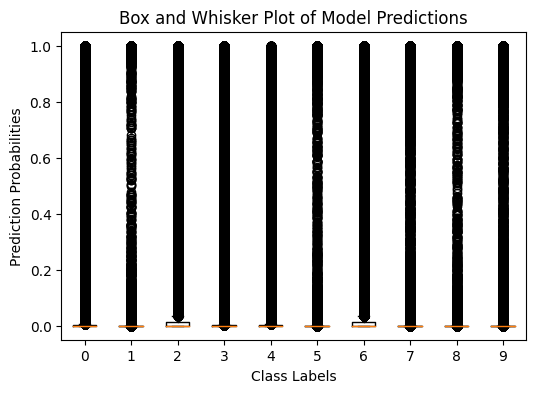

In [ ]:
# Plot the box and whisker plot
plt.figure(figsize=(6, 4))
plt.boxplot(predictions)
plt.xticks(np.arange(1, 11), range(10))
plt.xlabel('Class Labels')
plt.ylabel('Prediction Probabilities')
plt.title('Box and Whisker Plot of Model Predictions')
plt.show()

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5173 - accuracy: 0.8186 - val_loss: 0.3986 - val_accuracy: 0.8570
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3884 - accuracy: 0.8587 - val_loss: 0.4062 - val_accuracy: 0.8556
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3479 - accuracy: 0.8738 - val_loss: 0.3632 - val_accuracy: 0.8684
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3235 - accuracy: 0.8799 - val_loss: 0.3450 - val_accuracy: 0.8733
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3037 - accuracy: 0.8878 - val_loss: 0.3197 - val_accuracy: 0.8843
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2894 - accuracy: 0.8936 - val_loss: 0.3473 - val_accuracy: 0.8724
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2770 - accuracy: 0.8975 - val_loss: 0.3422 - val_accuracy:

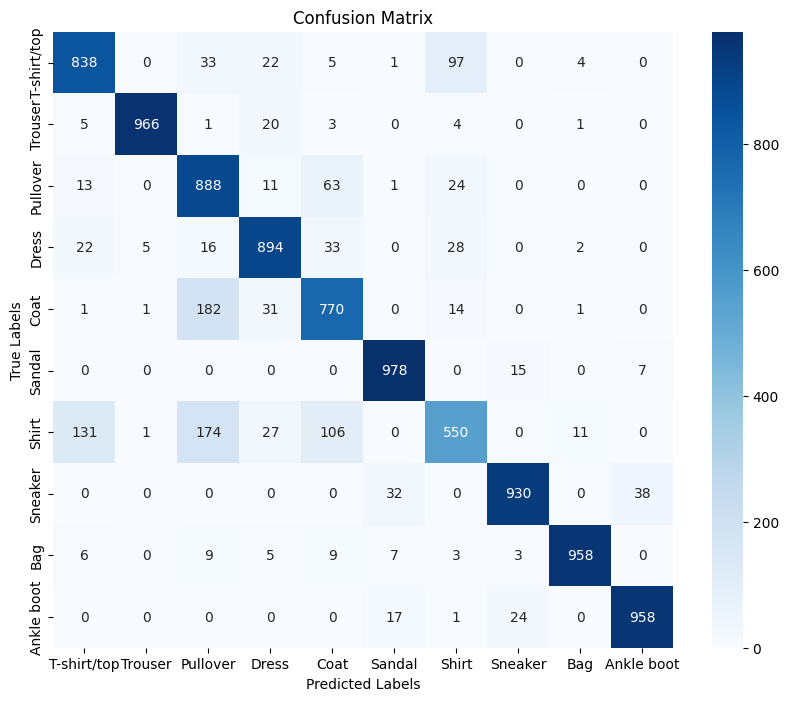

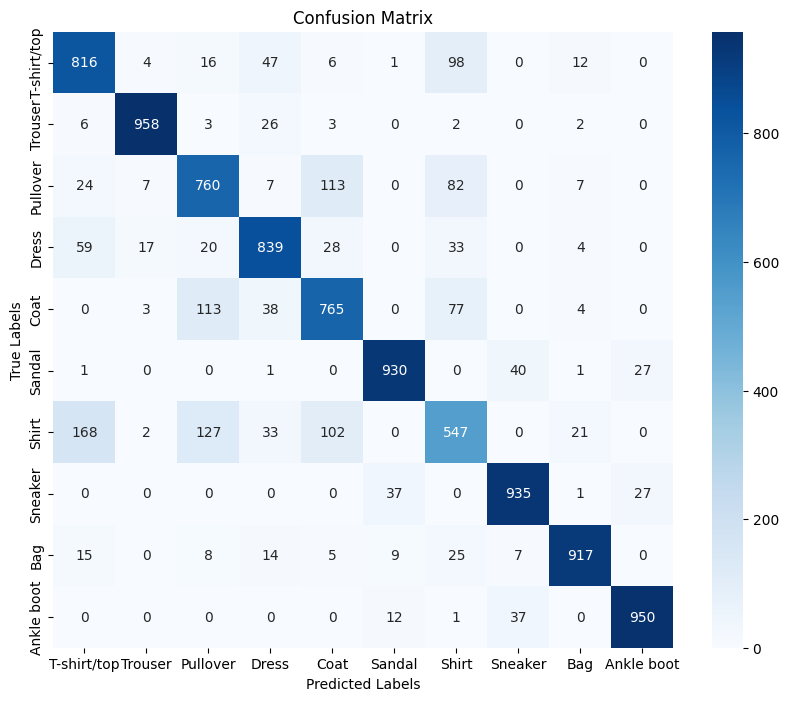

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Split the training set into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2)

# Normalize the images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# Reshape the training images for the CNN model
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)

# Create a CNN model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Create an SVM model
svm_model = SVC(kernel='linear')

# Reshape the training and test images for the SVM model
svm_train_images = train_images.reshape(train_images.shape[0], -1)
svm_test_images = test_images.reshape(test_images.shape[0], -1)

# Train the SVM model
svm_model.fit(svm_train_images, train_labels)

# Evaluate the CNN model
cnn_test_loss, cnn_test_accuracy = model.evaluate(test_images, test_labels)

# Calculate the CNN predictions
cnn_predictions = np.argmax(model.predict(test_images), axis=-1)

# Calculate the accuracy, precision, recall, and F1-score of the CNN model
cnn_test_accuracy = metrics.accuracy_score(test_labels, cnn_predictions)
cnn_precision = metrics.precision_score(test_labels, cnn_predictions, average='macro')
cnn_recall = metrics.recall_score(test_labels, cnn_predictions, average='macro')
cnn_f1 = metrics.f1_score(test_labels, cnn_predictions, average='macro')

# Evaluate the SVM model
svm_predictions = svm_model.predict(svm_test_images)

# Calculate the accuracy, precision, recall, and F1-score of the SVM model
svm_test_accuracy = metrics.accuracy_score(test_labels, svm_predictions)
svm_precision = metrics.precision_score(test_labels, svm_predictions, average='macro')
svm_recall = metrics.recall_score(test_labels, svm_predictions, average='macro')
svm_f1 = metrics.f1_score(test_labels, svm_predictions, average='macro')

print('CNN test accuracy:', cnn_test_accuracy)
print('CNN precision:', cnn_precision)
print('CNN recall:', cnn_recall)
print('CNN F1-score:', cnn_f1)
print('SVM test accuracy:', svm_test_accuracy)
print('SVM precision:', svm_precision)
print('SVM recall:', svm_recall)
print('SVM F1-score:', svm_f1)

# Function to visualize confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()

# For CNN model
cnn_confusion = metrics.confusion_matrix(test_labels, cnn_predictions)
plot_confusion_matrix(cnn_confusion, labels=class_names)

# For SVM model
svm_confusion = metrics.confusion_matrix(test_labels, svm_predictions)
plot_confusion_matrix(svm_confusion, labels=class_names)
